In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
#get train data
train = pd.read_csv('../apartment/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
# As we can see from the above, the total rows are 1460, and from the "info", we can see that Alley,PoolQC,MiscFeature,Fence have
# a lot of missing value, so we can ignore these features, and besides, the ID in this dataset is useless for house price predict

In [4]:
# 1 Analyse "SalePrice"

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

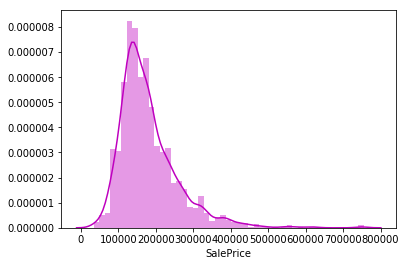

In [6]:
sns.distplot(train['SalePrice'],color="m")

In [7]:
# 2 realted features with saleprice

In [8]:
#2.1 select features by hand, after search on the internet, factors that influence house price, we get LotArea,Utilities,Neighborhood
# OverallQual,YearBuilt,CentralAir,GrLivArea,GarageCars,GarageArea

In [9]:
cols=['LotArea','Utilities','Neighborhood','OverallQual','YearBuilt','CentralAir','GrLivArea','GarageCars','GarageArea']
train[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
LotArea         1460 non-null int64
Utilities       1460 non-null object
Neighborhood    1460 non-null object
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
CentralAir      1460 non-null object
GrLivArea       1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
dtypes: int64(6), object(3)
memory usage: 102.7+ KB


In [10]:
# 2.1.1 try to see each features above with saleprice

In [11]:
# LotArea-SalePrice

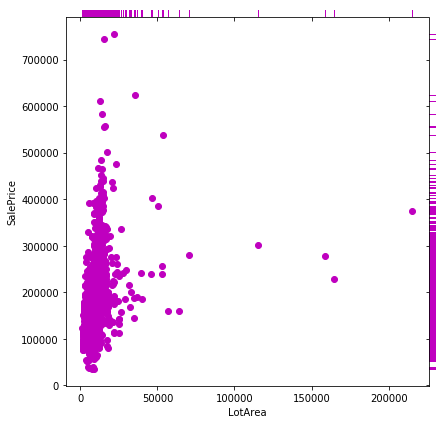

In [12]:
x=train['LotArea']
y=train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")

In [13]:
# GrLivArea-SalePrice

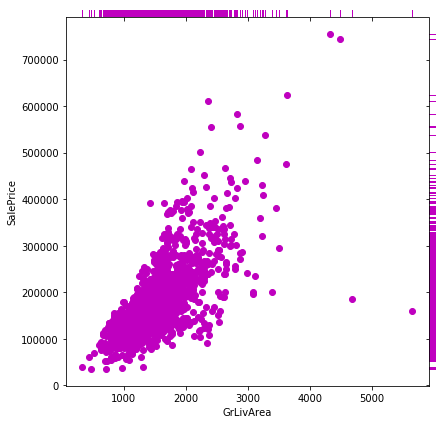

In [14]:
x=train['GrLivArea']
y=train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")

In [15]:
# GarageCars,GarageArea - SalePrice

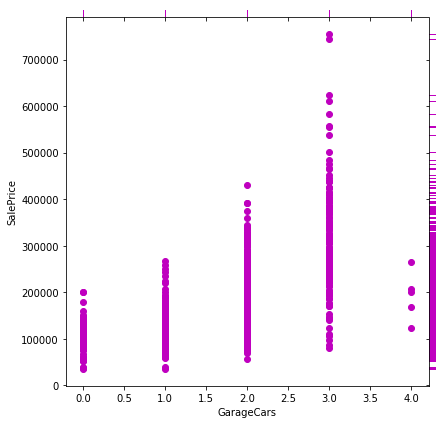

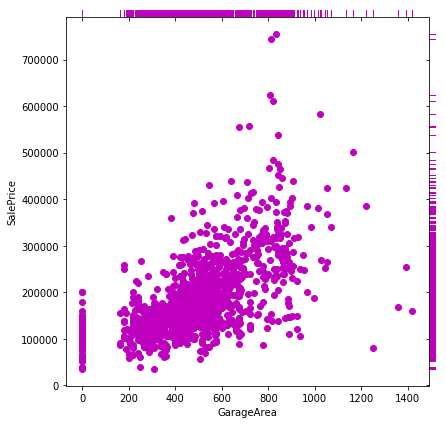

In [16]:
cols=['GarageCars','GarageArea']
for index in range(2):
    x=train[cols[index]]
    y=train['SalePrice']
    grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
    grid.plot_joint(plt.scatter, color="m")
    grid.plot_marginals(sns.rugplot, height=1, color="m")

In [17]:
# as we can see above, both two features are linear relation with saleprice, and later we can combine them together

In [18]:
# OverallQual-SalePrice

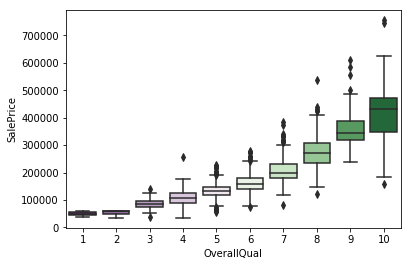

In [19]:
x=train['OverallQual']
y=train['SalePrice']
sns.boxplot(x, y, palette="PRGn")

In [20]:
# Utilities-SalePrice

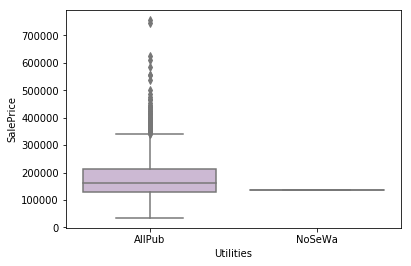

In [21]:
x=train['Utilities']
y=train['SalePrice']
sns.boxplot(x, y, palette="PRGn")

In [22]:
# as we can see from above, have AllPub is better than NoSeWa

In [23]:
# CentralAir- SalePrice

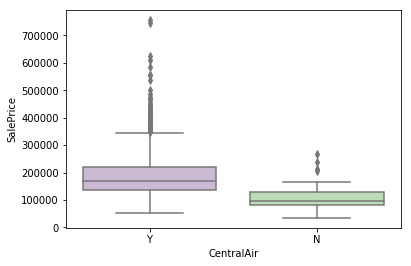

In [24]:
x=train['CentralAir']
y=train['SalePrice']
sns.boxplot(x, y, palette="PRGn")

In [25]:
# as we can see from above, have air is better than noair

In [26]:
# Neighborhood-SalePrice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

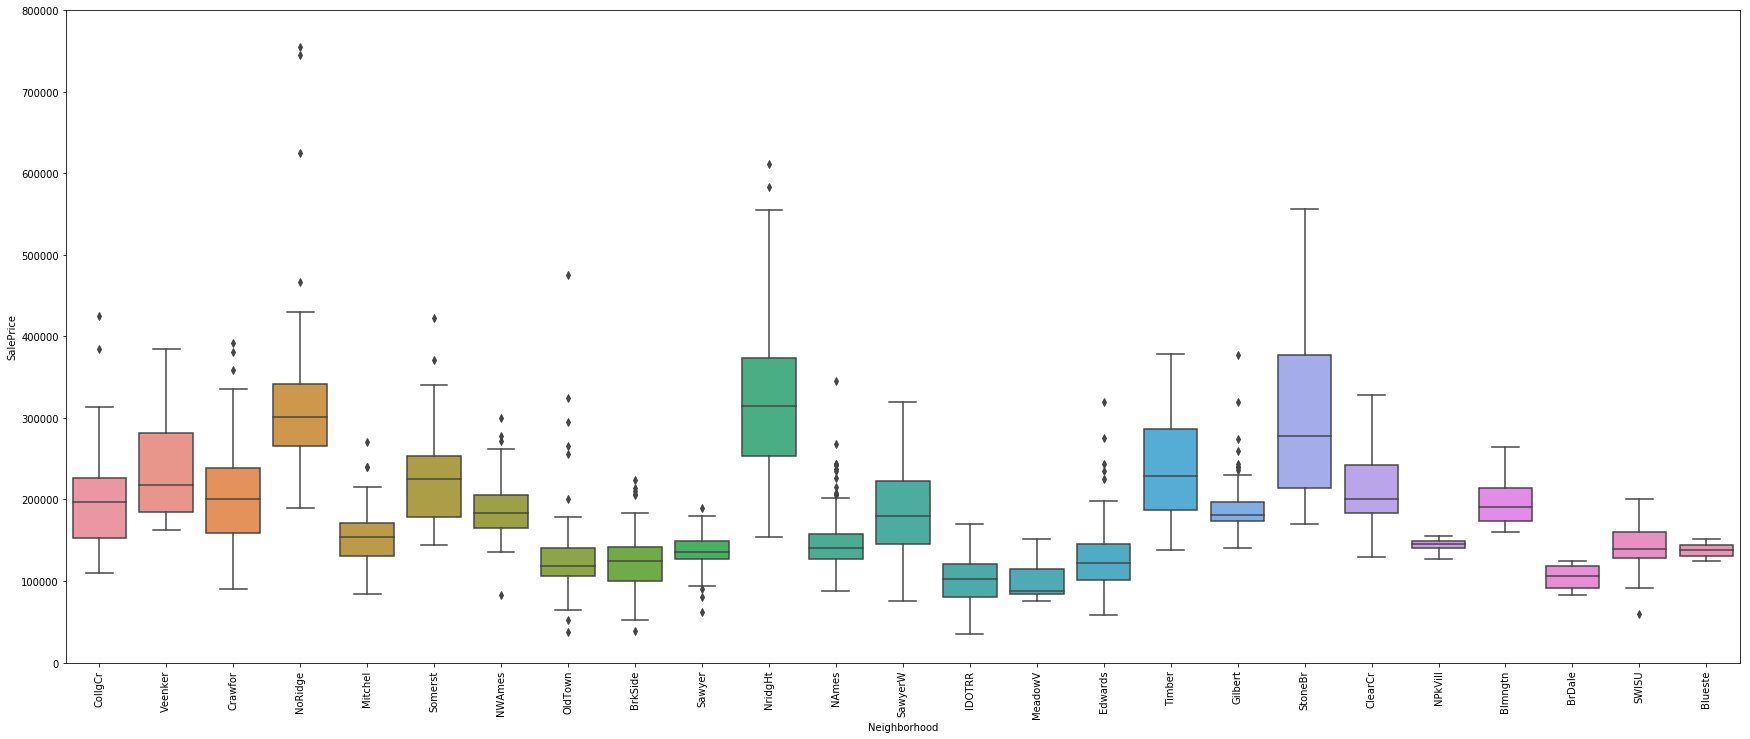

In [27]:
x=train['Neighborhood']
y=train['SalePrice']

data = pd.concat([y,x],axis=1)
f,ax = plt.subplots(figsize=(30,12))
fig = sns.boxplot(x,y, data = data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

In [28]:
# YearBuilt-SalePrice

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

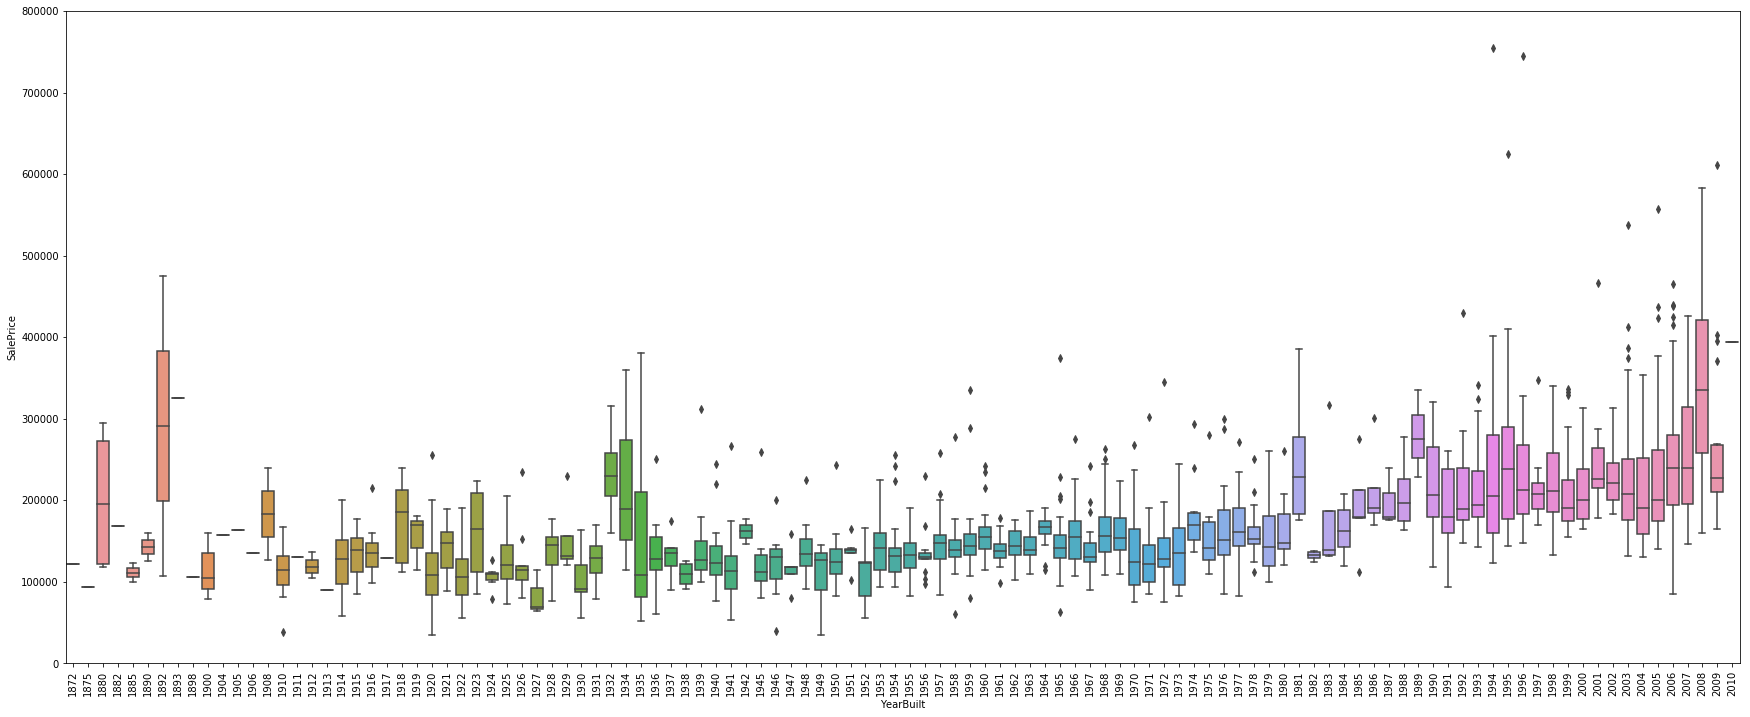

In [29]:
x=train['YearBuilt']
y=train['SalePrice']

data = pd.concat([y,x],axis=1)
f,ax = plt.subplots(figsize=(30,12))
fig = sns.boxplot(x,y, data = data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

In [30]:
# 2.2 try to see SalePrice with all features

In [31]:
# heatmap

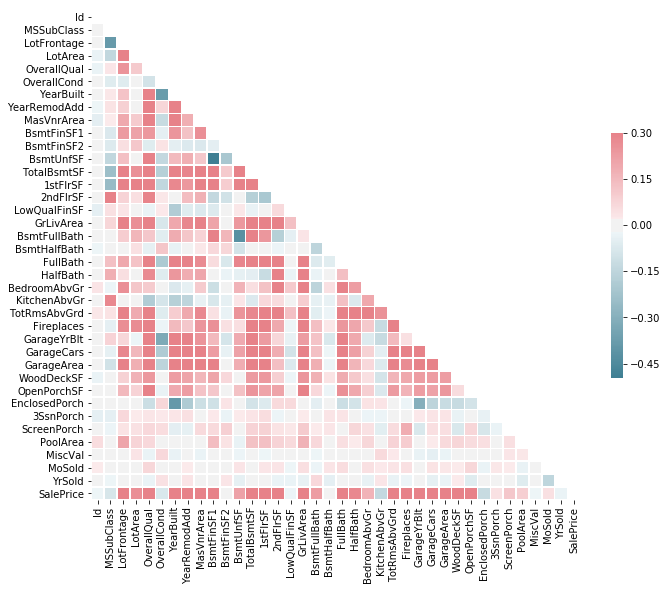

In [3]:
from sklearn import preprocessing
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
# as we can see from above, LoftFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF
# 2stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoddDeckSF,OpenPorchSF

In [5]:
from sklearn import preprocessing

catagorical_cols=[]
for column in train.columns.values:
    if (train[column].dtype=='O'):
        catagorical_cols.append(column)


for x in catagorical_cols:
    train[x]=train[x].fillna('None')


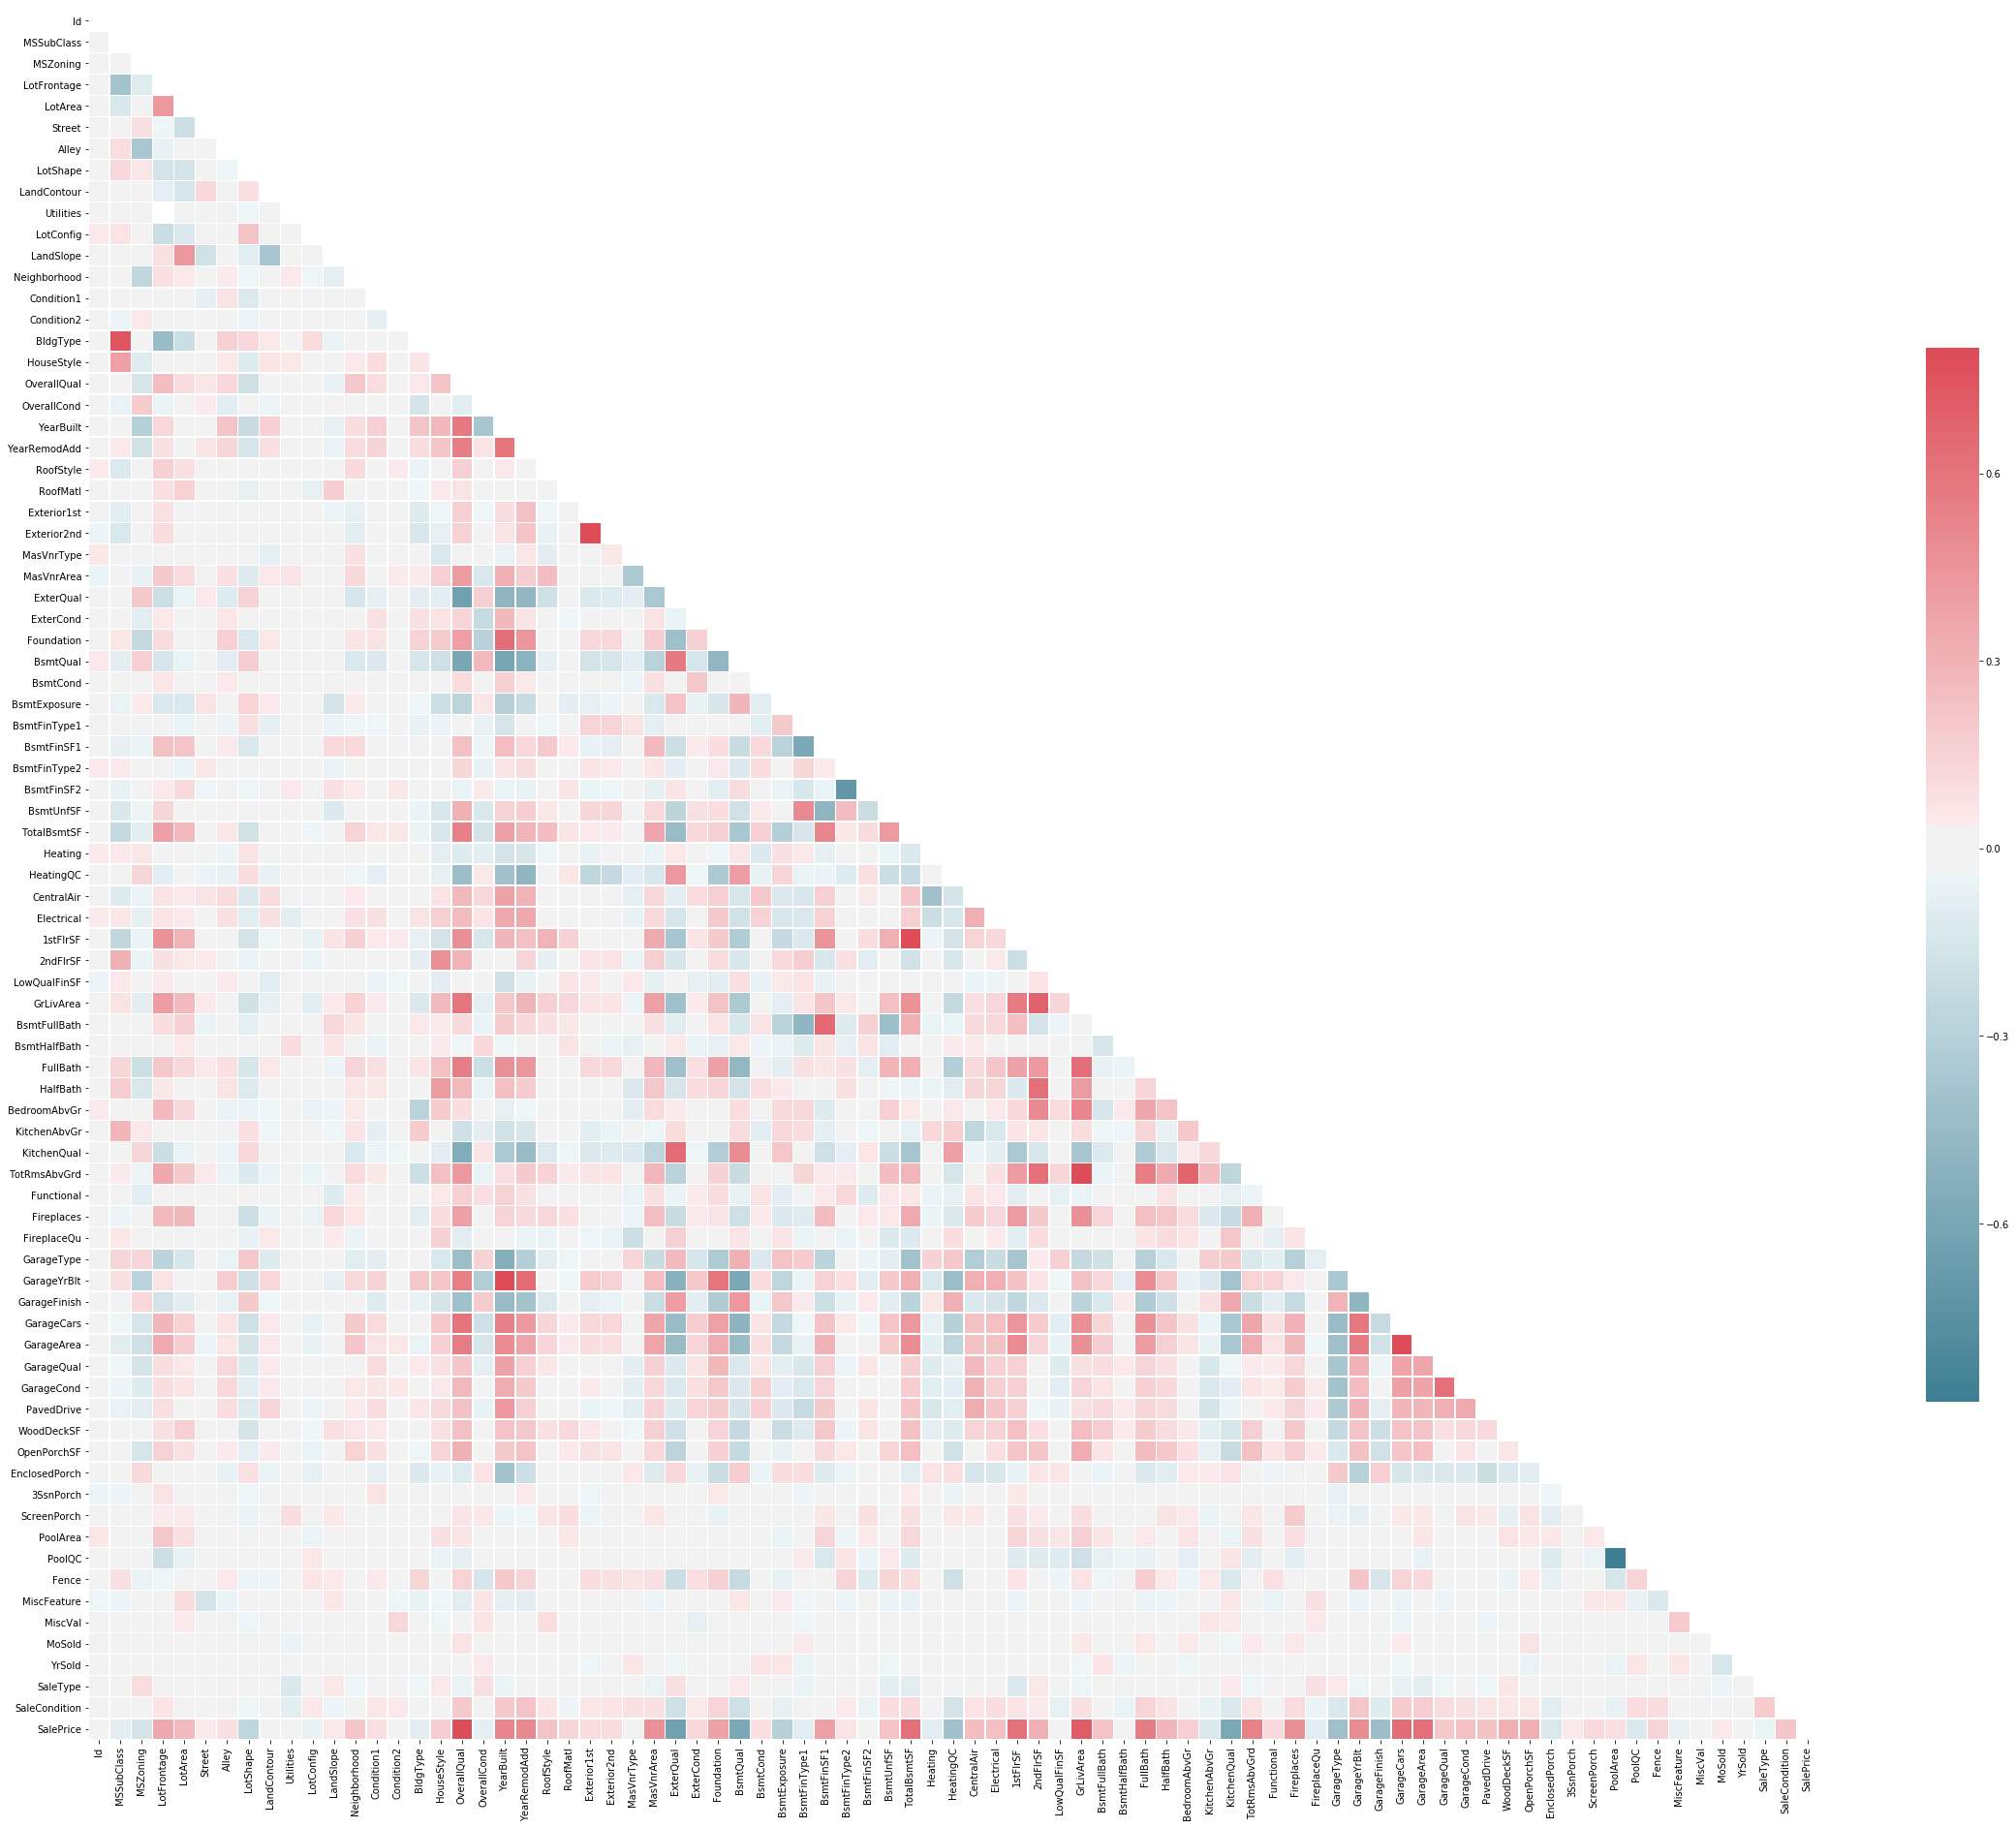

In [6]:
for x in catagorical_cols:
    label = preprocessing.LabelEncoder()
    train[x] = label.fit_transform(train[x])
#corrmat = train.corr()
#f, ax = plt.subplots(figsize=(200, 200))
#sns.heatmap(corrmat, vmax=0.8, square=True)

corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

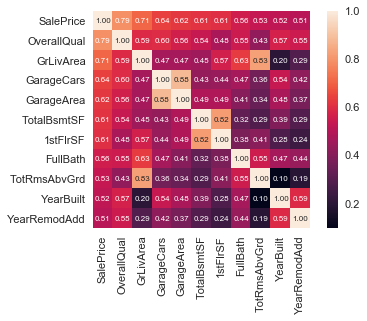

In [7]:
k = 11
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.1)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

In [8]:
#Feature Engineering

In [9]:
# 对于GarageCars GarageArea，这两个可以合并,并且把NA改成0

In [10]:
train['CarPerArea']=train['GarageArea']/train['GarageCars']
train['CarPerArea']=train['CarPerArea'].fillna(0)

In [11]:
# 对于 1stFlrSF(一楼面积)和TotalBsmtSF(地下室面积)

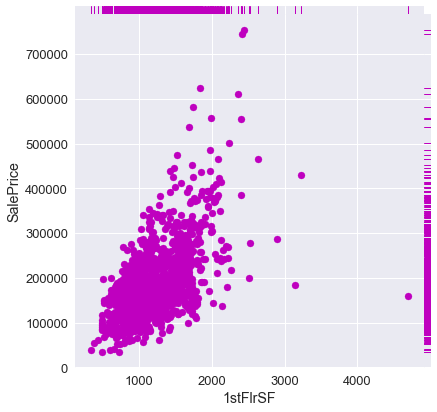

In [14]:
x=train['1stFlrSF']
y=train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")

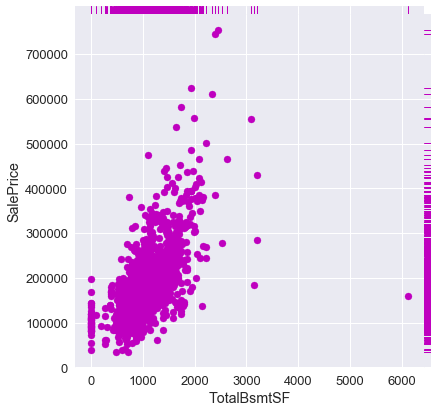

In [13]:
x=train['TotalBsmtSF']
y=train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")

In [14]:
#合并

In [12]:
train['basementAnd1stFloorArea'] = train['1stFlrSF']+train['TotalBsmtSF']

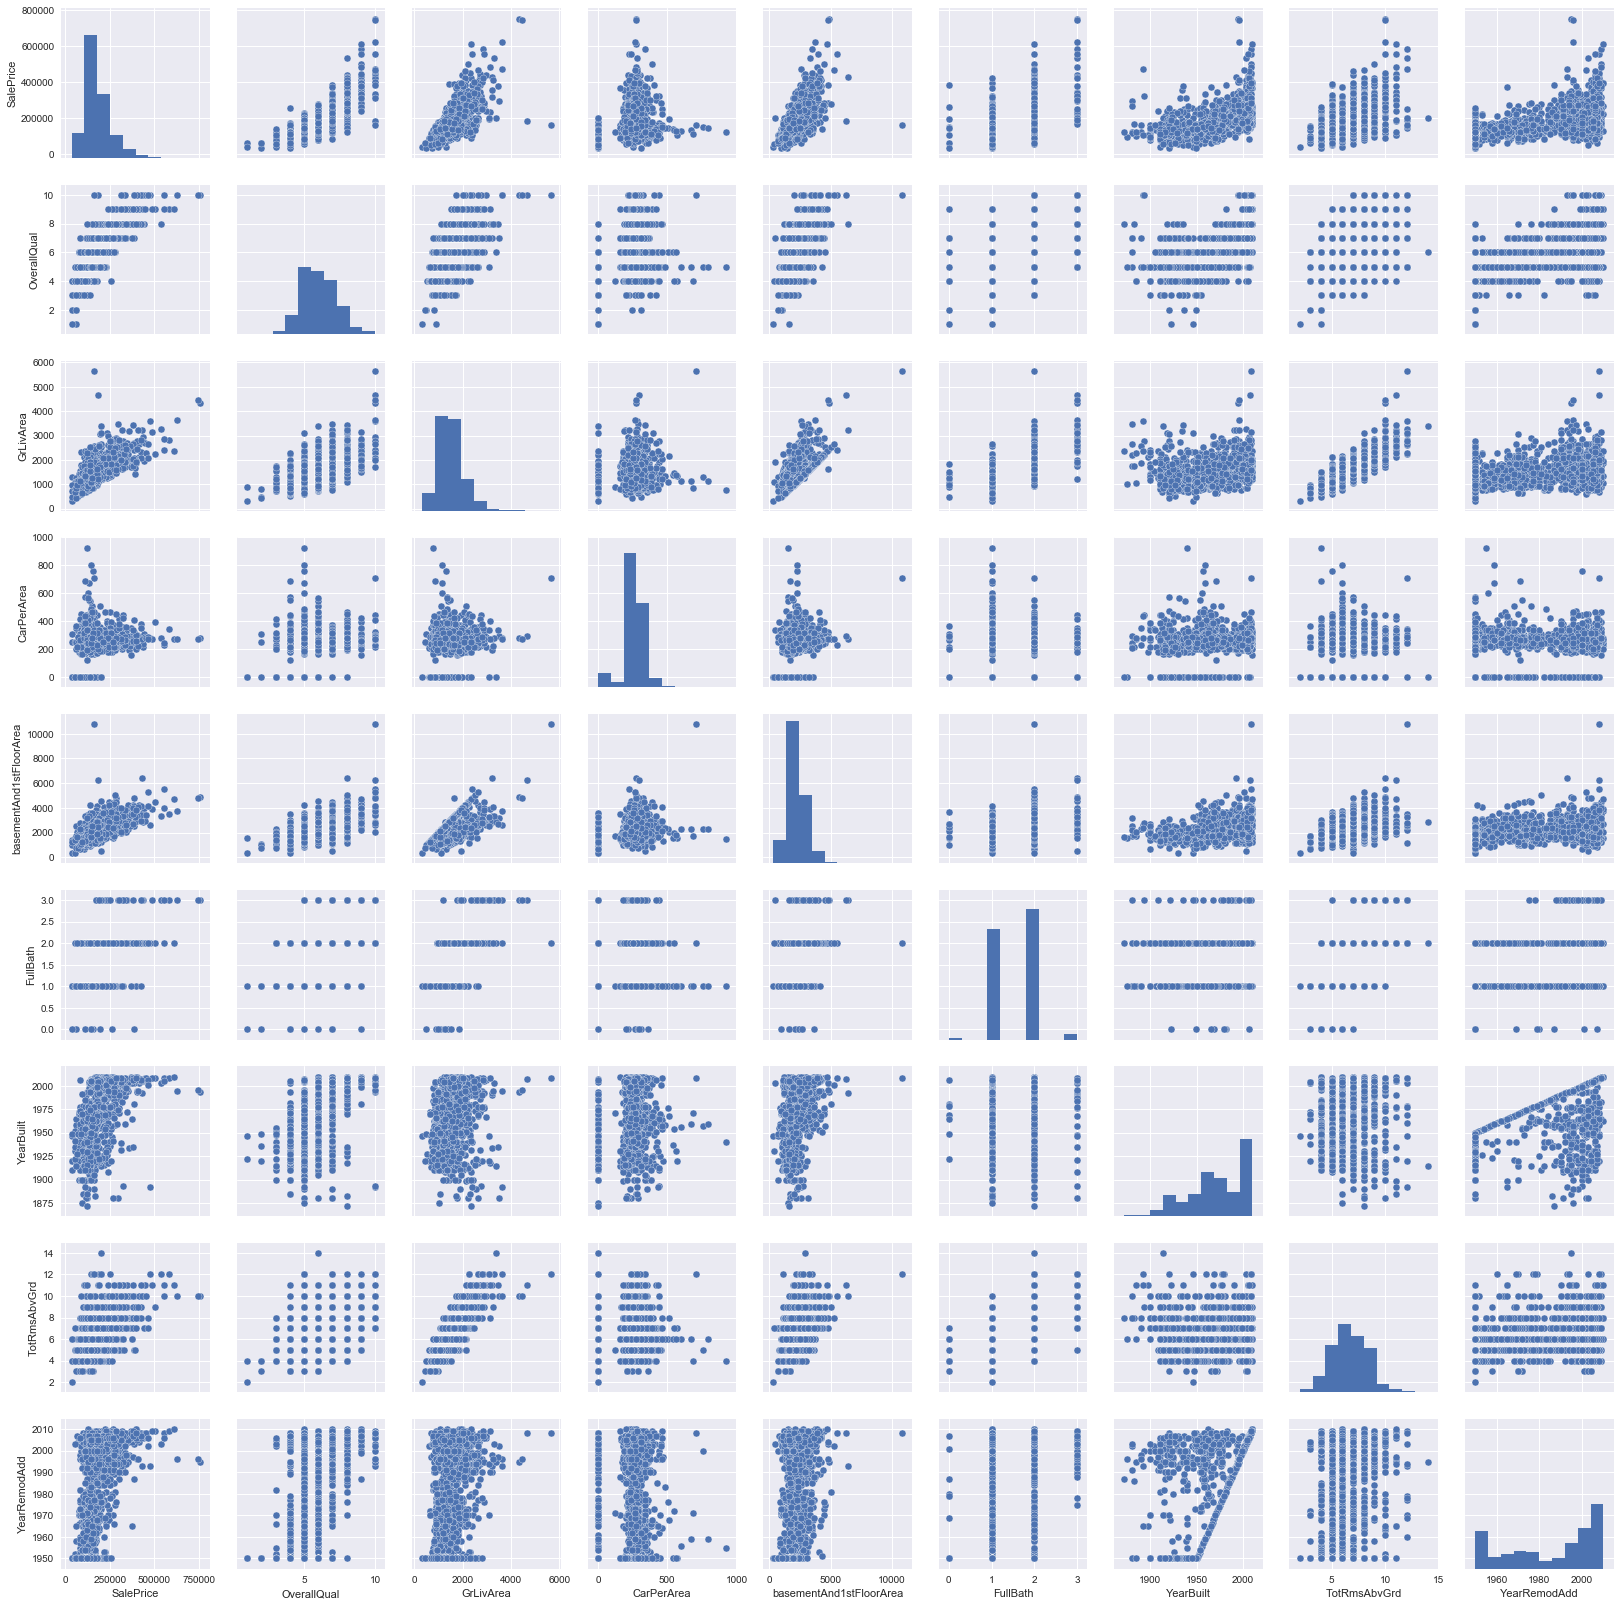

In [16]:
# Scatter plots between SalePrice and correlated variables
sns.set()
cols =['SalePrice','OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
sns.pairplot(train[cols],size=2.5)
plt.show()

In [47]:
#Missing Value

In [13]:
train[cols].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [17]:
#outlier

In [17]:
'''
x=train['CarPerArea']
y=train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")
'''

'\nx=train[\'CarPerArea\']\ny=train[\'SalePrice\']\ngrid = sns.JointGrid(x, y, space=0, size=6, ratio=50)\ngrid.plot_joint(plt.scatter, color="m")\ngrid.plot_marginals(sns.rugplot, height=1, color="m")\n'

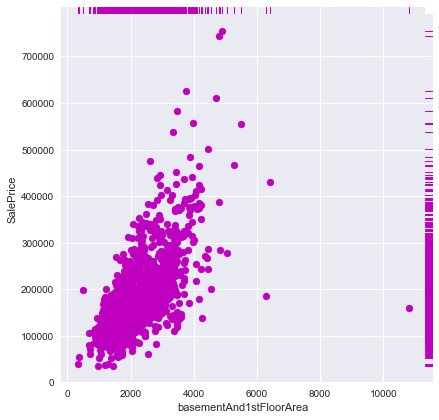

In [51]:
'''
x=train['basementAnd1stFloorArea']
y=train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")
'''

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarPerArea,basementAnd1stFloorArea
1298,1299,60,3,313.0,63887,1,1,2,0,0,...,4,1,0,1,2008,6,5,160000,709.000000,10802
523,524,60,3,130.0,40094,1,1,0,0,0,...,4,1,0,10,2007,6,5,184750,294.666667,6276


In [53]:
'''
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)
'''

In [54]:
'''
#CarPerArea
train.sort_values(by = 'CarPerArea', ascending = False)[:6]
'''

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarPerArea,basementAnd1stFloorArea
268,269,30,4,71.0,6900,1,1,3,3,0,...,4,1,0,2,2008,8,4,120500,924.0,1518
946,947,80,3,70.0,8163,1,1,3,3,0,...,4,1,0,3,2006,8,4,143000,796.0,2288
901,902,20,3,64.0,8712,1,1,0,3,0,...,4,1,0,5,2009,8,4,153000,756.0,2298
900,901,20,3,NaN,7340,1,1,0,3,0,...,4,1,0,6,2007,8,4,110000,684.0,1716
863,864,20,3,70.0,7931,1,1,3,3,0,...,0,1,0,7,2009,8,4,132500,672.0,2296
395,396,20,3,68.0,9571,1,1,3,3,0,...,4,1,0,6,2010,8,4,129000,596.0,2288


In [55]:
'''
train = train.drop(train[train['Id'] == 269].index)
train = train.drop(train[train['Id'] == 947].index)
train = train.drop(train[train['Id'] == 902].index)
train = train.drop(train[train['Id'] == 901].index)
train = train.drop(train[train['Id'] == 864].index)
train = train.drop(train[train['Id'] == 395].index)
'''

In [56]:
'''
#basementAnd1stFloorArea
train.sort_values(by = 'CarPerArea', ascending = False)[:1]
'''

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CarPerArea,basementAnd1stFloorArea
395,396,20,3,68.0,9571,1,1,3,3,0,...,4,1,0,6,2010,8,4,129000,596.0,2288


In [57]:
'''
train = train.drop(train[train['Id'] == 396].index)
'''

In [11]:
# using model

In [14]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import numpy as np

In [15]:
cols =['OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
X = train[cols].values.astype(np.float64)
y = train['SalePrice'].values.astype(np.float64)

#minmaxscaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X)
#X_scaled = minmaxscaler.fit_transform(X)
#y_scaled = minmaxscaler.fit_transform(y.reshape(-1,1))
#X_train,X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train2 = X_train
y_train2 = y_train

minmaxscaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X)
X_train = minmaxscaler.fit_transform(X_train)
#y_train = minmaxscaler.fit_transform(y_train.reshape(-1,1))
X_test = minmaxscaler.transform(X_test)
#y_test = minmaxscaler.transform(y_test.reshape(-1,1))

In [16]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=150),
        'LinearRegression':linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SGDRegressor':SGDRegressor(max_iter=5, tol = None),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'MLPRegressor':MLPRegressor(solver='adam', activation = 'relu',hidden_layer_sizes=(70,65,60,55,50,45,40,35,30,25,20,15,10,5), max_iter=1000, learning_rate='adaptive', random_state= None),
        'Lasso':Lasso(alpha = 0.1,max_iter=1000,random_state=None)
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train.ravel())   #why need to make this ravel()??
        y_pred = clfs[clf].predict(X_test)
        #print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)))
        #print(clf + " score:" + str(np.mean(np.absolute(y_pred-y_test))))
        print(clf + " score:" + str(np.sqrt(np.mean((np.log(y_pred)-np.log(y_test))*(np.log(y_pred)-np.log(y_test))))))
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm score:0.411763159828
RandomForestRegressor score:0.157761797602
LinearRegression score:0.212728681809
DecisionTreeRegressor score:0.218666754305
SGDRegressor score:0.26068563914
GradientBoostingRegressor score:0.161249858575
MLPRegressor score:0.175914582291
Lasso score:0.212725399187


In [19]:
# For test dataset

In [20]:
test = pd.read_csv('../apartment/test.csv')

In [21]:
model = RandomForestRegressor(n_estimators=400)

In [22]:
test['basementAnd1stFloorArea'] =test['1stFlrSF']+test['TotalBsmtSF']

In [23]:
test['basementAnd1stFloorArea'].describe()

count     1458.000000
mean      2202.831276
std        794.678312
min        612.000000
25%       1670.250000
50%       2054.500000
75%       2684.000000
max      10190.000000
Name: basementAnd1stFloorArea, dtype: float64

In [24]:
# 处理feature engineering
test['CarPerArea']=test['GarageArea']/test['GarageCars']

In [25]:
test['CarPerArea'].describe()

count    1382.000000
mean      272.566184
std        59.561485
min       100.000000
25%       236.500000
50%       264.000000
75%       299.000000
max       730.000000
Name: CarPerArea, dtype: float64

In [26]:
test['CarPerArea']=test['CarPerArea'].fillna(272.566184)
test['basementAnd1stFloorArea']=test['basementAnd1stFloorArea'].fillna(2202.831276)

In [23]:
test[cols].isnull().sum()

OverallQual                0
GrLivArea                  0
CarPerArea                 0
basementAnd1stFloorArea    0
FullBath                   0
YearBuilt                  0
TotRmsAbvGrd               0
YearRemodAdd               0
dtype: int64

In [27]:
# first way for result
model.fit(X_train2,y_train2)
X = test[cols]
y_predict = model.predict(X)

In [25]:
# second way for result
XX = train[cols].values
yy = train['SalePrice'].values
X_train1,X_test1, y_train1, y_test1 = train_test_split(XX, yy, test_size=0.30, random_state=42)
model.fit(X_train1,y_train1)
X = test[cols]
y_predict = model.predict(X)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [28]:
print(y_predict.shape)

(1459,)


In [29]:
predicted_result = pd.DataFrame(data = y_predict,columns=['SalePrice'])
result = pd.concat([test['Id'],predicted_result],axis=1)

In [30]:
result.to_csv('../apartment/predictFinal.csv',index = False)